**Join The Competition!** 
* https://www.kaggle.com/c/dont-call-me-turkey/overview




**Import Library and Load Dataset**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load dataset
df_train = pd.read_json('../content/drive/My Drive/dont-call-me-turkey/train.json')
df_test = pd.read_json('../content/drive/My Drive/dont-call-me-turkey/test.json')

**Explore Data Analysis**

In [27]:
# Dataset preview
df_train.head()

,audio_embedding,is_turkey,vid_id,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",0,kDCk3hLIVXo,70,60
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",1,DPcGzqHoo7Y,40,30
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",1,7yM63MTHh5k,240,230
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",1,luG3RmUAxxM,520,510
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",0,PIm3cjxTpOk,10,0


In [28]:
# Number of rows and columns
print(df_train.shape)
print(df_test.shape)

(1195, 5)
(1196, 4)


In [29]:
# Data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 5 columns):
audio_embedding                    1195 non-null object
is_turkey                          1195 non-null int64
vid_id                             1195 non-null object
end_time_seconds_youtube_clip      1195 non-null int64
start_time_seconds_youtube_clip    1195 non-null int64
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


In [30]:
# Data Statistics
df_train.describe()

,is_turkey,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip
count,1195.000000,1195.000000,1195.000000
mean,0.410879,87.013389,77.085356
std,0.492199,107.750860,107.697523
min,0.000000,2.000000,0.000000
25%,0.000000,40.000000,30.000000
50%,0.000000,40.000000,30.000000
75%,1.000000,90.000000,80.000000
max,1.000000,600.000000,590.000000


In [31]:
# Check null data
df_train.isnull().sum()

audio_embedding                    0
is_turkey                          0
vid_id                             0
end_time_seconds_youtube_clip      0
start_time_seconds_youtube_clip    0
dtype: int64

length
2        5
3        1
4        2
5        3
6        4
7        1
8        3
9       56
10    1120
dtype: int64
the maximum length of audo: 10


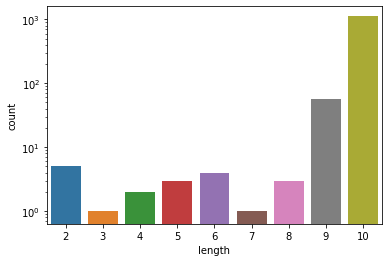

In [32]:
# Audio_Length vs Count
df_train['length']=df_train['audio_embedding'].apply(len)
print(df_train.groupby(['length']).size())

# The maximum length of audio
print('the maximum length of audo:', df_train['length'].max())

# Histogram Plot
plt.yscale('log')
sns.countplot(df_train['length'])

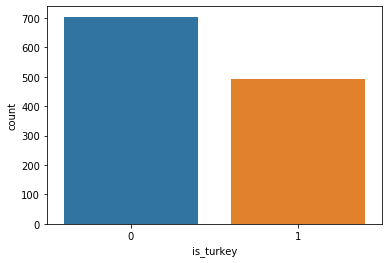

In [33]:
# Is_Turkey vs Count
df_train.groupby(['is_turkey']).size()
sns.countplot(df_train['is_turkey'])

In [34]:
# Is_Turkey vs Audio_Length
pd.crosstab(index=df_train.length, columns=df_train.is_turkey)

is_turkey,0,1
length,,
2,4,1
3,1,0
4,1,1
5,1,2
6,3,1
7,0,1
8,1,2
9,22,34
10,671,449


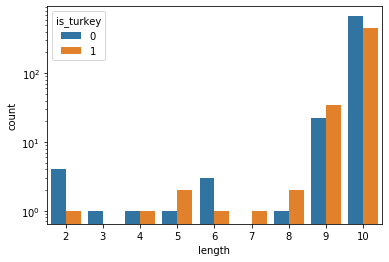

In [35]:
plt.yscale('log')
sns.countplot("length", hue="is_turkey", data=df_train)

**Training and Inference**

In [0]:
def create_df(df,label='True'):
  """
  This function is used for flatten audio_embedding
  df - original dataframe
  label - True for training dataset; Fasle for testing dataset
  """
  df_new = pd.DataFrame([])
  for  i in range(df.shape[0]):
    df_temp=pd.DataFrame(df['audio_embedding'].iloc[i])
    df_temp['vid_id'] = df['vid_id'].iloc[i]
    if label == 'True':
      df_temp['is_turkey'] = df['is_turkey'].iloc[i]
    df_new=df_new.append(df_temp)
  return df_new

In [37]:
df_train_new = create_df(df_train)
df_train_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,vid_id,is_turkey
0,172,34,216,110,208,46,95,66,161,125,83,39,106,146,90,144,109,111,194,58,24,228,81,128,18,94,197,161,56,0,85,97,206,74,165,126,95,121,132,105,...,156,215,255,255,68,255,148,0,247,206,91,18,177,191,54,116,79,92,36,12,153,29,96,170,26,255,162,255,0,0,1,170,0,8,255,129,4,255,kDCk3hLIVXo,0
1,171,39,199,121,238,62,59,61,170,146,96,76,121,139,76,102,146,142,159,64,0,252,119,134,93,90,176,215,120,42,134,160,159,87,86,190,111,89,61,47,...,122,186,246,109,111,255,101,31,93,115,112,0,51,201,138,227,93,190,142,119,255,157,91,252,89,237,53,98,0,70,0,237,0,49,255,126,188,255,kDCk3hLIVXo,0
2,169,33,200,97,210,22,73,51,169,129,101,91,110,158,72,116,117,113,131,68,0,255,80,187,57,100,229,138,130,26,110,125,188,62,55,138,118,93,109,69,...,183,255,253,187,137,255,178,0,255,252,182,0,46,49,154,243,89,160,65,105,153,96,94,208,147,204,129,48,0,48,106,207,0,39,234,205,33,255,kDCk3hLIVXo,0
3,180,39,218,118,213,73,80,43,160,147,97,45,92,145,109,84,152,174,137,94,58,188,52,148,28,119,155,222,79,97,159,189,66,114,126,183,146,70,95,151,...,194,232,248,110,124,255,62,0,111,90,159,94,155,157,35,255,13,228,199,245,56,166,192,239,186,205,46,194,19,117,35,137,0,58,255,103,153,255,kDCk3hLIVXo,0
4,166,31,204,134,211,59,62,73,187,167,71,69,114,171,75,110,88,113,147,103,19,238,111,141,9,107,204,177,107,0,89,61,187,109,139,103,169,91,3,129,...,99,241,223,212,122,255,148,0,148,158,62,5,217,107,145,216,134,55,63,71,255,71,127,164,37,213,173,215,0,0,0,219,0,152,255,58,177,255,kDCk3hLIVXo,0


In [38]:
df_train_new.shape

(11795, 130)

In [0]:
# Training and Testing Dataset
from sklearn.model_selection import train_test_split
X= df_train_new.drop(['is_turkey','vid_id'], axis=1)
y =df_train_new['is_turkey']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [40]:
# Logistic Regression
from sklearn import linear_model, metrics
model=linear_model.LogisticRegression()
model.fit(X_train,y_train)

# Evaluation
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8965809550720543

**Submittion**

In [41]:
df_test_new = create_df(df_test, label='False')
df_test_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,vid_id
0,177,20,226,132,198,81,111,59,132,184,58,43,108,85,56,88,103,194,193,53,90,255,86,70,6,109,0,242,7,2,206,108,0,91,255,180,92,20,8,218,...,48,0,255,164,186,147,255,0,50,255,188,147,255,209,217,235,232,41,200,208,196,0,192,113,210,55,132,0,255,3,255,0,255,229,0,255,184,48,255,pyKh38FXD3E
1,168,19,221,138,219,88,161,77,120,182,45,82,101,100,92,87,79,202,184,60,76,255,105,49,0,143,0,155,67,15,201,64,37,55,232,191,85,0,72,218,...,65,0,255,183,255,44,255,0,88,177,157,133,159,198,189,170,255,59,255,176,151,105,255,160,94,185,224,189,255,0,255,0,255,255,0,255,36,95,255,pyKh38FXD3E
2,170,21,212,121,206,91,108,56,136,193,95,130,117,64,122,109,84,133,205,67,41,255,74,110,0,143,0,207,115,73,146,125,29,172,199,204,95,39,78,209,...,112,55,255,106,191,145,255,0,40,244,255,81,125,130,193,144,91,112,137,188,177,0,87,95,150,194,153,0,255,0,218,17,78,146,0,255,171,131,255,pyKh38FXD3E
3,171,22,216,137,201,90,108,62,131,187,73,45,95,133,91,87,111,141,215,70,60,255,69,122,0,103,68,197,96,41,155,41,97,70,238,214,158,43,69,159,...,92,42,255,184,168,58,255,0,45,199,167,95,199,191,199,200,235,48,202,135,90,35,145,149,127,255,135,117,255,22,227,0,255,140,19,255,201,38,255,pyKh38FXD3E
4,175,25,224,141,220,109,103,49,99,187,129,96,124,79,78,119,105,123,212,95,26,255,27,116,0,18,26,245,72,45,184,60,56,97,255,125,99,115,15,157,...,161,54,251,172,252,146,255,0,48,200,211,139,215,226,188,223,31,26,120,217,208,38,125,7,255,27,181,0,255,0,151,0,146,153,0,255,141,0,255,pyKh38FXD3E


In [42]:
df_test_new.shape

(11839, 129)

In [0]:
from sklearn.model_selection import train_test_split
X_submit = df_test_new.drop(['vid_id'], axis=1)
y_submit = model.predict(X_submit)

In [44]:
# Concate "vid_id" and "is_turkey"
result = pd.concat([df_test_new.vid_id.reset_index(drop=True), pd.Series(y_submit, name='is_turkey')], axis=1)
result.head()

,vid_id,is_turkey
0,pyKh38FXD3E,0
1,pyKh38FXD3E,0
2,pyKh38FXD3E,0
3,pyKh38FXD3E,0
4,pyKh38FXD3E,0


In [45]:
# Group "vid_id" by the maximum of "is_turkey"
inal_result = result.groupby('vid_id').is_turkey.max().sort_values()
final_result = final_result.reset_index()
final_result.head()

,index,vid_id,is_turkey
0,0,TM9rc0zFmTc,0
1,1,i5Z22Qw5_vc,0
2,2,LLsKr1v6uE8,0
3,3,LG7XGMqy8D8,0
4,4,iLIR8xbxu64,0


In [0]:
# Convert to CSV file
final_result.to_csv('submission.csv', index=False)